In [2]:
import pandas as pd

# Load data
file_path = 'E:\zomoto-Data-Analysis\data\Zomato-data-.csv'  # adjust if needed
df = pd.read_csv(file_path)


<>:4: SyntaxWarning: invalid escape sequence '\z'
<>:4: SyntaxWarning: invalid escape sequence '\z'
C:\Users\Admin\AppData\Local\Temp\ipykernel_38024\2730441881.py:4: SyntaxWarning: invalid escape sequence '\z'
  file_path = 'E:\zomoto-Data-Analysis\data\Zomato-data-.csv'  # adjust if needed


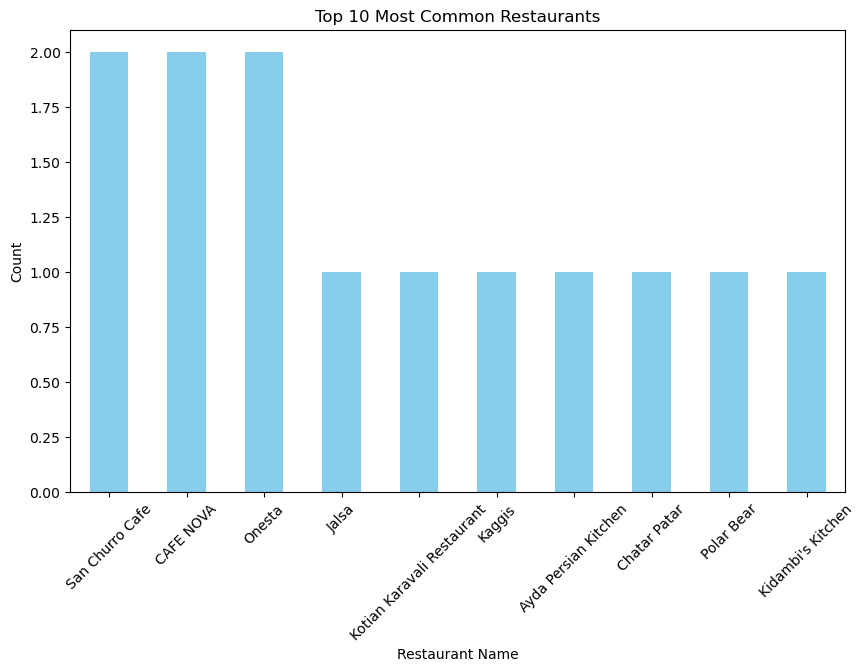

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
df['name'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


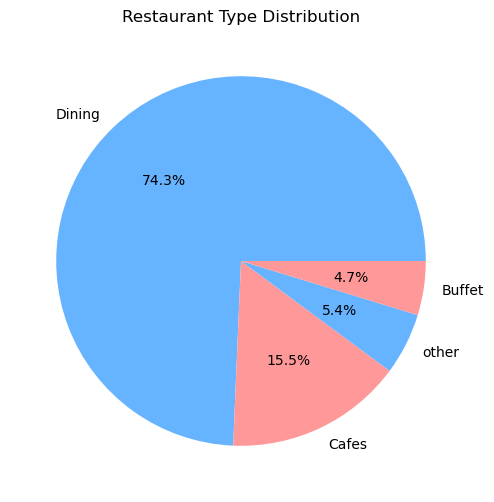

In [5]:
plt.figure(figsize=(6,6))
df['listed_in(type)'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.ylabel('')
plt.title('Restaurant Type Distribution')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_38024\438889982.py:20: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='price_band',


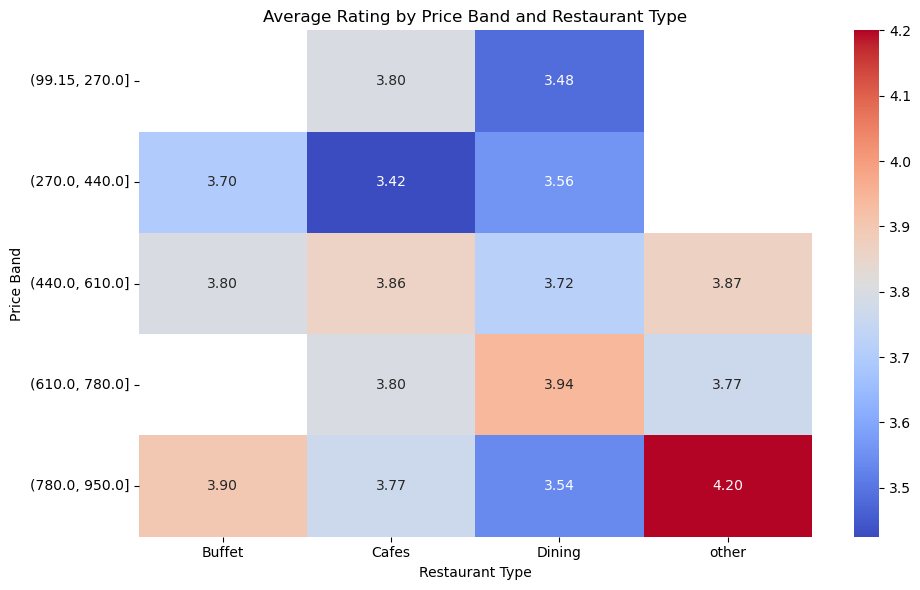

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'rate_cleaned' exists
df['rate_cleaned'] = df['rate'].replace(['NEW', '-'], None)
df['rate_cleaned'] = df['rate_cleaned'].str.extract(r'(\d+\.\d+)').astype(float)

# Convert cost to float if needed
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '', regex=False)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

# Drop rows with missing values
df = df.dropna(subset=['rate_cleaned', 'approx_cost(for two people)', 'listed_in(type)'])

# Create price bands
df['price_band'] = pd.cut(df['approx_cost(for two people)'], bins=5)

# Pivot table for heatmap
pivot = df.pivot_table(index='price_band',
                       columns='listed_in(type)',
                       values='rate_cleaned',
                       aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Rating by Price Band and Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Price Band')
plt.tight_layout()
plt.show()
